In [1]:
import pandas as pd
import numpy as np

from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold, cross_val_score
import matplotlib.pylab as plt
import seaborn as sns

# Silence warnings
import warnings
warnings.filterwarnings('ignore')

# Import train_test_split
from sklearn.model_selection import train_test_split

# Import XGBRegressor
from xgboost import XGBClassifier

# Import accuracy_score
from sklearn.metrics import accuracy_score

# Classification Report
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df = pd.read_csv('Segmentation.csv')

In [3]:
df.head()

,CustomerID,Recency,Tenure,Frequency,MonetaryValue,Segment
0,12346,326,326,2,0.00,Fence Sitter
1,12349,19,19,73,1757.55,Potential
2,12350,310,310,17,334.40,Fence Sitter
3,12353,204,204,4,89.00,Fence Sitter
4,12354,232,232,58,1079.40,Fence Sitter


In [4]:
df.shape

(3046, 6)

In [5]:
df['Segment'].value_counts()

Potential       1587
Fence Sitter    1030
Loyal            429
Name: Segment, dtype: int64

In [6]:
dict_map = {'Potential':0,
          'Fence Sitter':1,
          'Loyal':2}

In [7]:
df['Segment_coded'] = df['Segment'].map(dict_map)

In [8]:
df.drop('Segment',axis=1,inplace=True)

In [9]:
df.head()

,CustomerID,Recency,Tenure,Frequency,MonetaryValue,Segment_coded
0,12346,326,326,2,0.00,1
1,12349,19,19,73,1757.55,0
2,12350,310,310,17,334.40,1
3,12353,204,204,4,89.00,1
4,12354,232,232,58,1079.40,1


In [10]:
target = ['Segment_coded']

In [11]:
features = [col for col in df if col !='Segment_coded']
features

['CustomerID', 'Recency', 'Tenure', 'Frequency', 'MonetaryValue']

In [12]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], random_state=2)

In [13]:
xgb = XGBClassifier(booster='gbtree', objective='multi:softprob', 
                    learning_rate=0.1, n_estimators=100, random_state=2, n_jobs=-1)

xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

score = accuracy_score(y_pred, y_test)

print('Score: ' + str(score))

Score: 0.994750656167979


In [14]:
def grid_search(params, random=False): 
    
    xgb = XGBClassifier(booster='gbtree', objective='multi:softprob', 
                    learning_rate=0.1, n_estimators=100, random_state=2, n_jobs=-1)
    
    if random:
        grid = RandomizedSearchCV(xgb, params, cv=5, n_jobs=-1, random_state=2)
    else:
        # Instantiate GridSearchCV as grid_reg
        grid = GridSearchCV(xgb, params, cv=5, n_jobs=-1)
    
    # Fit grid_reg on X_train and y_train
    grid.fit(X_train, y_train)

    # Extract best params
    best_params = grid.best_params_

    # Print best params
    print("Best params:", best_params)
    
    # Compute best score
    best_score = grid.best_score_

    # Print best score
    print("Training score: {:.5f}".format(best_score))

    # Predict test set labels
    y_pred = grid.predict(X_test)

    # Compute rmse_test
    acc = accuracy_score(y_test, y_pred)

    # Print rmse_test
    print('Test score: {:.5f}'.format(acc))

In [15]:
grid_search(params={'n_estimators':[100, 200, 400, 800]})


Best params: {'n_estimators': 200}
Training score: 0.99650
Test score: 0.99475


In [16]:
grid_search(params={'learning_rate':[0.01, 0.05, 0.1, 0.2, 0.3]})

Best params: {'learning_rate': 0.1}
Training score: 0.99606
Test score: 0.99475


In [17]:
grid_search(params={'max_depth':[2, 3, 5, 6, 8]})

Best params: {'max_depth': 6}
Training score: 0.99606
Test score: 0.99475


In [18]:
grid_search(params={'gamma':[0, 0.01, 0.1, 0.5, 1, 2]})

Best params: {'gamma': 0}
Training score: 0.99606
Test score: 0.99475


In [19]:
grid_search(params={'min_child_weight':[0.5, 1, 2, 3, 5]})

Best params: {'min_child_weight': 1}
Training score: 0.99606
Test score: 0.99475


In [20]:
grid_search(params={'subsample':[0.5, 0.7, 0.8, 0.9, 1]})


Best params: {'subsample': 1}
Training score: 0.99606
Test score: 0.99475


In [21]:
grid_search(params={'colsample_bytree':[0.5, 0.7, 0.8, 0.9, 1]})

Best params: {'colsample_bytree': 1}
Training score: 0.99606
Test score: 0.99475


In [22]:
xgb_1 = XGBClassifier(booster='gbtree', objective='multi:softprob', 
                    learning_rate=0.1, n_estimators=200, random_state=2, n_jobs=-1)

In [23]:
xgb_1.fit(X_train, y_train)

y_pred1 = xgb_1.predict(X_test)

score = accuracy_score(y_pred1, y_test)

print('Score: ' + str(score))

Score: 0.994750656167979


In [24]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       405
           1       1.00      1.00      1.00       251
           2       0.99      0.98      0.99       106

    accuracy                           0.99       762
   macro avg       0.99      0.99      0.99       762
weighted avg       0.99      0.99      0.99       762



In [25]:
cm = confusion_matrix(y_test, y_pred1)
cm

array([[404,   1,   0],
       [  0, 250,   1],
       [  2,   0, 104]])

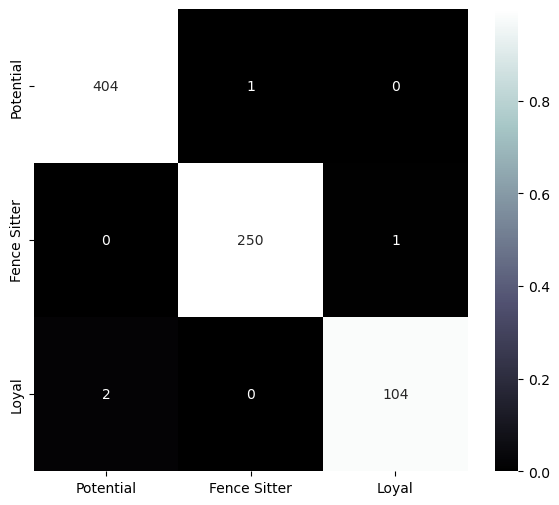

In [27]:
def plot_confusion_matrix(cm, classes, normalized=True, cmap='bone'):
    plt.figure(figsize=[7, 6])
    norm_cm = cm
    if normalized:
        norm_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        sns.heatmap(norm_cm, annot=cm, fmt='g', xticklabels=classes, yticklabels=classes, cmap=cmap)

plot_confusion_matrix(cm, ['Potential', 'Fence Sitter', 'Loyal'])

In [29]:
y_test['Segment_coded'].value_counts()

0    405
1    251
2    106
Name: Segment_coded, dtype: int64